<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning_All/blob/main/Regression_Multiple_Linear_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiple Linear Regression (MLR)**
Author: **Siddik Barbhuiya**

Email: **siddikbarbhuiya@gmail.com**

Multiple Linear Regression (MLR), as the name suggests, is a regression model that uses multiple predictors to predict the outcome of a respons


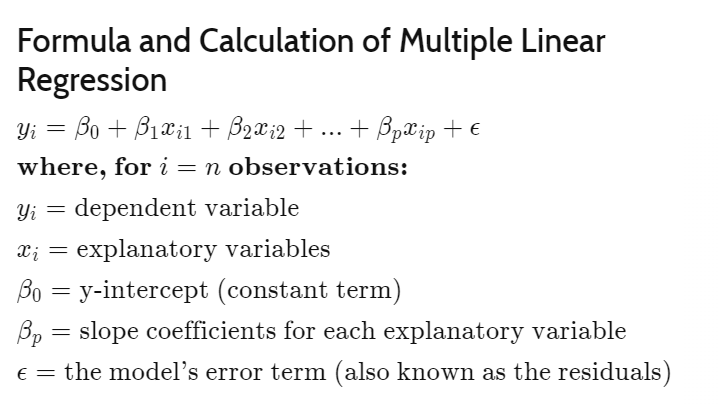



**Assumptions**:
multiple linear regression  has a few assumptions:

>**Linearity:** The relationship between predictors and the response variable should be linear.

>**Independence:** Observations should be independent of each other.

>**Homoscedasticity**: Variance of the errors should be consistent across all levels of the independent variables.

>**No multicollinearity:** Predictors should not be too highly correlated with each other.

>**Normality:** For hypothesis testing, the residuals should be approximately normally distributed.

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [21]:
data = pd.read_csv('Startups.csv')


In [22]:
# Data Preprocessing
# --------------------------
# One-hot encoding the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True)

# Splitting the data into dependent and independent variables
X = data_encoded.drop('Profit', axis=1).values
y = data_encoded['Profit'].values

Categorical data needs to be converted to a numerical format for MLR. We're using one-hot encoding here.

The drop='first' argument ensures we avoid the "dummy variable trap" by dropping the first dummy variable.

In [23]:
# --------------------------
# Feature Selection using Backward Elimination
# --------------------------
X_optimal = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)
predictor_indices = list(range(X_optimal.shape[1]))
significance_level = 0.05

while True:
    X_current = X_optimal[:, predictor_indices]
    regressor_OLS = sm.OLS(endog=y, exog=X_current).fit()
    max_p_value = max(regressor_OLS.pvalues)
    if max_p_value > significance_level:
        excluded_predictor = np.argmax(regressor_OLS.pvalues)
        predictor_indices.pop(excluded_predictor)
    else:
        break

In [37]:
# Fitting the OLS model with the optimal predictors
regressor_OLS = sm.OLS(endog=y, exog=X_current).fit()

# Extracting p-values and cross-referencing with column names
p_values = regressor_OLS.pvalues
significant_predictors = [data_encoded.columns[i] for i in predictor_indices if p_values[i] < significance_level]

# Displaying the result
print("The following predictors are statistically significant and influence the target variable (Profit):")
print(", ".join(significant_predictors))


The following predictors are statistically significant and influence the target variable (Profit):
R&D Spend, Administration


**Backward Elimination** is a stepwise regression method. In stepwise regression, you add or remove predictors based on their statistical significance in the regression. With backward elimination:

>You start with all predictors in the model.

>Check the predictor with the highest p-value.

>If its p-value is greater than a set significance level (often 0.05), remove this predictor.

>Refit the model without this predictor and go to step 2.

>Stop when all predictors have a p-value less than the set significance level.


The idea is that predictors that are not statistically significant do not contribute much to the explanatory power of the model, and removing them can lead to a simpler, more interpretable, and more accurate model.

In [27]:
# --------------------------
# Model Building and Evaluation
# --------------------------
X_train_optimal, X_test_optimal, y_train, y_test = train_test_split(X_current, y, test_size=0.2, random_state=0)
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train_optimal, y_train)


LinearRegression()

In [25]:
# Evaluate with K-Fold cross-validation
cross_val_scores = cross_val_score(estimator=regressor, X=X_train_optimal, y=y_train, cv=30, scoring='neg_mean_squared_error')
mean_mse = -cross_val_scores.mean()
print(f"Mean Squared Error from Cross-Validation: {mean_mse}")

Mean Squared Error from Cross-Validation: 108261227.11830002


# **K-Fold Cross-Validation:**
***Theory***

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The primary objective of cross-validation is to estimate the expected performance of a model on unseen data.

***Steps involved in K-Fold Cross-Validation:***

> Partition the Original Training Data: The entire dataset is divided into K equal-sized folds or as close to equal as possible.

> Model Training and Evaluation: For each unique group (from 1 to K):


*  Take the group as a test data set (validation set).
*  Take the remaining groups as a training data set.
*  Train a model on the training set and evaluate it on the test set.
*  Retain the evaluation score and discard the model.

> Result Summary:Summarize the skill of the model using the sample of model evaluation scores.



***Advantages of K-Fold Cross-Validation:***

*  Reduces Overfitting: By training the model on different subsets of the data, it reduces the chances of the model overfitting to a specific subset.

*  Better Utilization of Data: Since we use both training and test data effectively across all folds, it's especially useful when the dataset size is limited.
*  Provides Model Stability: It gives a better idea of how well the model will perform on unseen data.

***Choosing the Right K:***

*  General Rule: Common choices for K are 5 or 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.
*  Larger K: Provides a less biased model (since almost all observations are used for both training and validation), but can also be computationally expensive since the algorithm runs K times.

In [38]:
y_train_pred = regressor.predict(X_train_optimal)
y_test_pred = regressor.predict(X_test_optimal)

In [32]:
#Calculation of R-square
from sklearn.metrics import r2_score
r_train=r2_score(y_train_pred, y_train)
r_test=r2_score(y_test_pred,y_test)
print(f"The Value of R square In traning",r_train,"testing",r_test)

The Value of R square In traning 0.9417530036174434 testing 0.9446480449871659


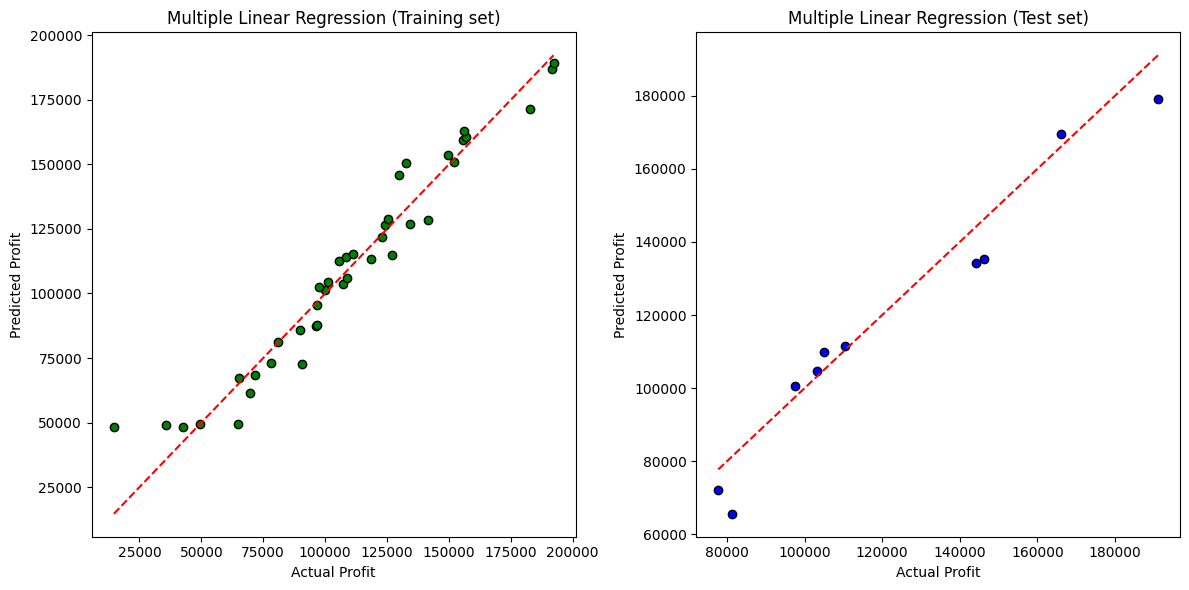

In [36]:
#Ploting the data

plt.figure(figsize=(12, 6))

# Subplot for Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='green', edgecolor='k')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Multiple Linear Regression (Training set)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

# Subplot for Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Multiple Linear Regression (Test set)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.tight_layout()
plt.show()

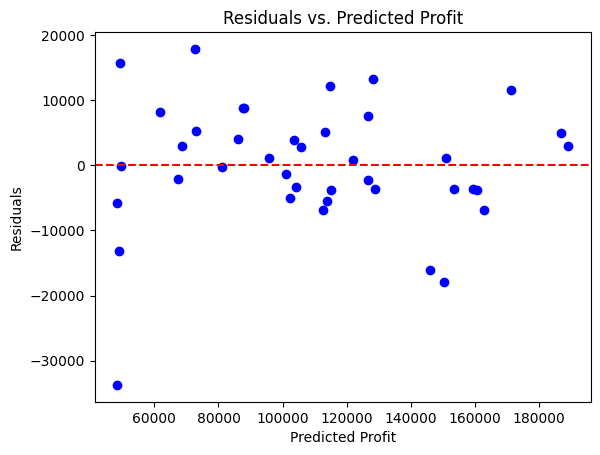

In [20]:
# Residual Analysis
y_train_pred = regressor.predict(X_train_optimal)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Profit')
plt.show()

# **Refrence**
Sklearn: [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Analytic Vidya : [K-Fold Cross validation](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%2Dvalidation%20is,estimate%20the%20model's%20generalization%20performance.)